<a href="https://colab.research.google.com/github/Kaushal28/ML/blob/master/Object_Detection_on_CFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# imports
import numpy as np
import pickle
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
!wget cifar.tar.gz https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar zxvf cifar-10-python.tar.gz -C .

--2019-06-06 04:47:28--  http://cifar.tar.gz/
Resolving cifar.tar.gz (cifar.tar.gz)... failed: Name or service not known.
wget: unable to resolve host address ‘cifar.tar.gz’
--2019-06-06 04:47:28--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  74.8MB/s    in 2.2s    

2019-06-06 04:47:30 (74.8 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

FINISHED --2019-06-06 04:47:30--
Total wall clock time: 2.5s
Downloaded: 1 files, 163M in 2.2s (74.8 MB/s)
cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifa

In [0]:
# function to read the dateset
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [0]:
# read the meta file and print possible labels
meta_data = unpickle('cifar-10-batches-py/batches.meta')
print ('Possible Labels')
for index in range(10):
  print ('{0} - {1}'.format(index, str(meta_data[b'label_names'][index])[2:-1]))

Possible Labels
0 - airplane
1 - automobile
2 - bird
3 - cat
4 - deer
5 - dog
6 - frog
7 - horse
8 - ship
9 - truck


In [0]:
# Process the training and testing data and make in Neural Network comfortable

def process_batch(batch_path, a, b):
  batch = unpickle(batch_path)
  imgs = np.array(batch[b'data'])
  labels = np.array(batch[b'labels'])
  
  if (a.size == 0 and b.size == 0):
    a = imgs
    b = labels
  else:
    a = np.r_[a, imgs]
    b = np.r_[b, labels]
  
  return a, b
  
  print (imgs[0])
#   print (labels.shape)

X_train, y_train, X_test, y_test = np.array([]), np.array([]), np.array([]), np.array([])

X_train, y_train = process_batch('cifar-10-batches-py/data_batch_1', X_train, y_train)
X_train, y_train = process_batch('cifar-10-batches-py/data_batch_2', X_train, y_train)
X_train, y_train = process_batch('cifar-10-batches-py/data_batch_3', X_train, y_train)
X_train, y_train = process_batch('cifar-10-batches-py/data_batch_4', X_train, y_train)
X_train, y_train = process_batch('cifar-10-batches-py/data_batch_5', X_train, y_train)

X_test, y_test = process_batch('cifar-10-batches-py/test_batch', X_test, y_test)

y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

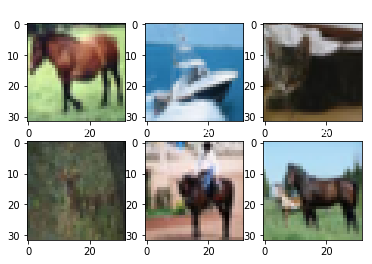

In [0]:
# # Plot few images from training set
count = 0
for index in range (7, 13):
  plt.subplot(2, 3, count + 1)
  plt.title(str(meta_data[b'label_names'][np.argmax(y_train[index], axis = 0)])[2:-1], color = 'white')
  plt.imshow(X_train[index].reshape(3, 32, 32).transpose([1, 2, 0]))
  count += 1
  
plt.show()

In [0]:

# Define the model and train it
model = Sequential()

model.add(Dense(units = 3072, input_dim = 3072, activation = 'relu'))
model.add(Dense(units = 1024, activation = 'relu'))
model.add(Dense(units = 525, activation = 'relu'))
model.add(Dense(units = 150, activation = 'relu'))
model.add(Dense(units = 125, activation = 'relu'))
model.add(Dense(units = 95, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=12000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
50000/50000 [==============================] - 53s 1ms/step - loss: 2.5554 - acc: 0.1094
Epoch 2/100
50000/50000 [==============================] - 51s 1ms/step - loss: 2.4527 - acc: 0.1043
Epoch 3/100
50000/50000 [==============================] - 51s 1ms/step - loss: 2.2991 - acc: 0.1315
Epoch 4/100
50000/50000 [==============================] - 51s 1ms/step - loss: 2.2541 - acc: 0.1461
Epoch 5/100
50000/50000 [==============================] - 51s 1ms/step - loss: 2.2038 - acc: 0.1609
Epoch 6/100
50000/50000 [==============================] - 51s 1ms/step - loss: 2.1452 - acc: 0.1893
Epoch 7/100
50000/50000 [==============================] - 51s 1ms/step - loss: 2.0935 - acc: 0.2118
Epoch 8/100
50000/50000 [==============================] - 51s 1ms/step - loss: 2.0451 - acc: 0.2306
Epoch 9/100
50000/50000 [==============================] - 51s 1ms/step 

In [0]:
# Evaluate the mode
print (model.evaluate(X_test, y_test))

wrong = 0

for x, y in zip(X_test, y_test):
  if not (np.argmax(model.predict(x.reshape(1, -1))) == np.argmax(y)):
    wrong += 1
    
print ('Manually calculated accuracy: {0}'.format((1 - wrong / 10000) * 100))


10000/10000 [==============================] - 10s 995us/step
[1.3971461105346679, 0.5097]
Manually calculated accuracy: 50.970000000000006


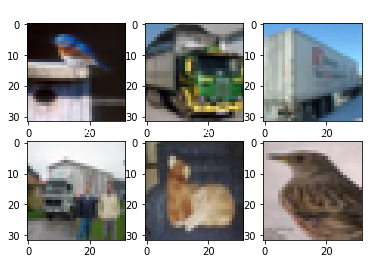

In [0]:
# Plot few predications
count = 0
for index in range (13, 19):
  plt.subplot(2, 3, count + 1)
  string = str(meta_data[b'label_names'][np.argmax(model.predict(X_test[index].reshape(1, -1)))])[2:-1]
  plt.title(string, color = 'white')
  plt.imshow(X_train[index].reshape(3, 32, 32).transpose([1, 2, 0]))
  count += 1
  
plt.show()